# Credit card eligibility dataset EDA

https://www.kaggle.com/datasets/rohit265/credit-card-eligibility-data-determining-factors/data

In [100]:
import pandas as pd
import os
os.chdir('/workspaces/credit-card-eligibility/')

In [101]:
data = pd.read_csv('notebooks/dataset.csv')
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [3]:
# Check number of rows and columns
data.shape

(9709, 20)

In [4]:
# Get summary statistics
data.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [115]:
# Check NULLs
data.isnull().value_counts()

ID     Gender  Own_car  Own_property  Work_phone  Phone  Email  Unemployed  Num_children  Num_family  Account_length  Total_income  Age    Years_employed  Income_type  Education_type  Family_status  Housing_type  Occupation_type  Target
False  False   False    False         False       False  False  False       False         False       False           False         False  False           False        False           False          False         False            False     9709
Name: count, dtype: int64

In [116]:
# Check duplicates
data.duplicated('ID').value_counts()

False    9709
Name: count, dtype: int64

## Visualizations

In [69]:
import matplotlib.pyplot as plt

from lib.eda import (
    plot_category_frequency,
    get_labels_values_for_plot,
    get_cut_bins_from_labels,
    Labels
)

In [7]:
%load_ext autoreload
%autoreload 2

### Convert some continuous variables into categorical variables for plotting

In [117]:
continuous_cols = ['Age', 'Account_length', 'Total_income', 'Years_employed']

for column in continuous_cols:
    cut_bins = get_cut_bins_from_labels(Labels.CATEGORICAL_LABELS[column])
    data[f'{column}_bucket'] = pd.cut(
        data[column],
        bins=cut_bins, 
        labels=Labels.CATEGORICAL_LABELS[column],
        include_lowest=False
        )

In [119]:
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target,Age_bucket,Account_length_bucket,Total_income_bucket,Years_employed_bucket
0,5008804,1,1,1,1,0,0,0,0,2,...,Working,Higher education,Civil marriage,Rented apartment,Other,1,25-34,10-29,200000-2000000,10-24
1,5008806,1,1,1,0,0,0,0,0,2,...,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,55-200,10-29,100000-149999,0-3
2,5008808,0,0,1,0,1,1,0,0,1,...,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,45-54,0-3,200000-2000000,4-9
3,5008812,0,0,1,0,0,0,1,0,1,...,Pensioner,Higher education,Separated,House / apartment,Other,0,55-200,10-29,200000-2000000,NaN
4,5008815,1,1,1,1,1,1,0,0,2,...,Working,Higher education,Married,House / apartment,Accountants,0,45-54,4-9,200000-2000000,0-3


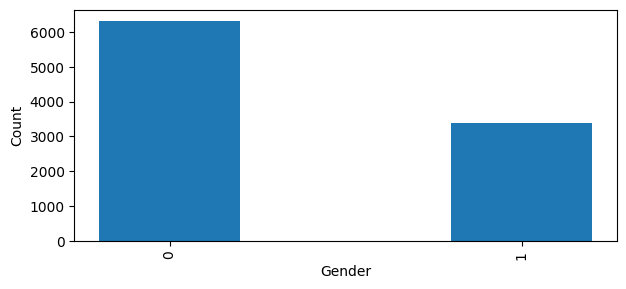

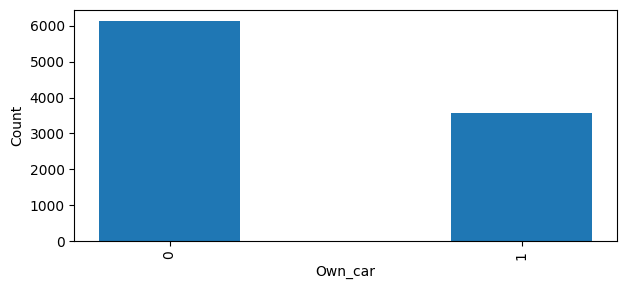

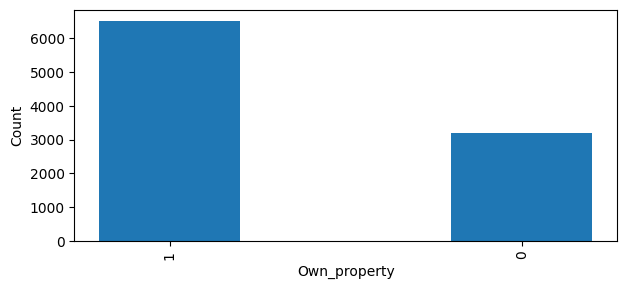

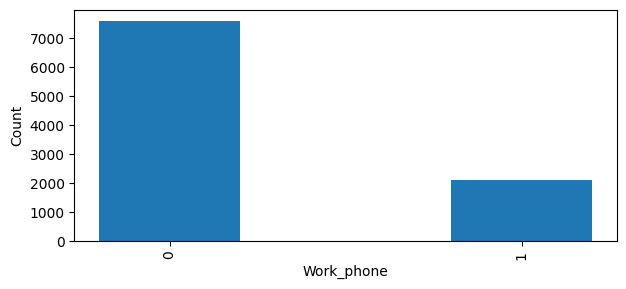

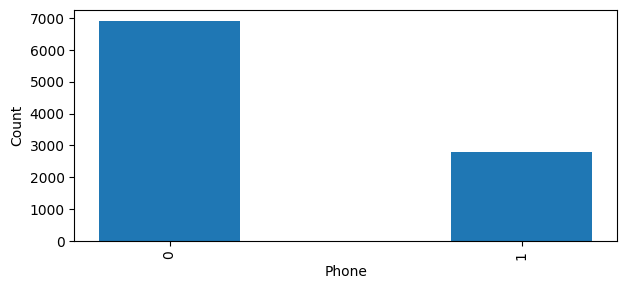

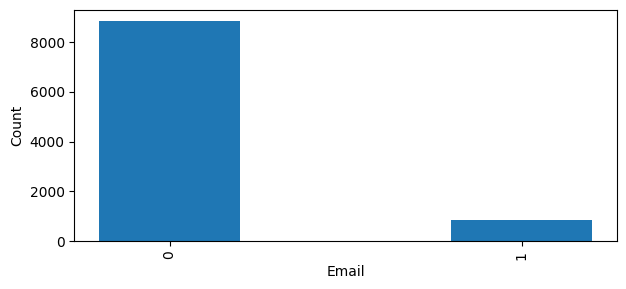

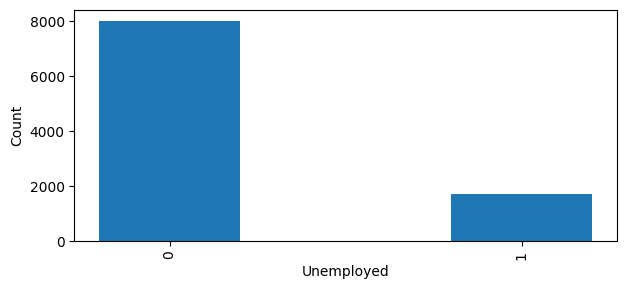

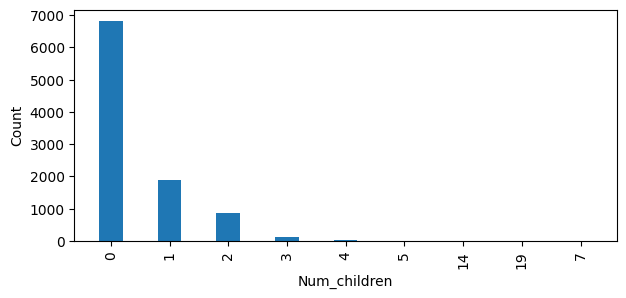

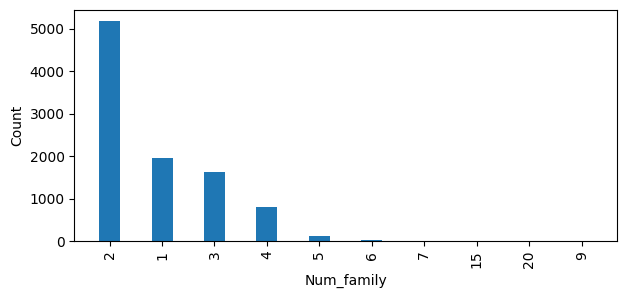

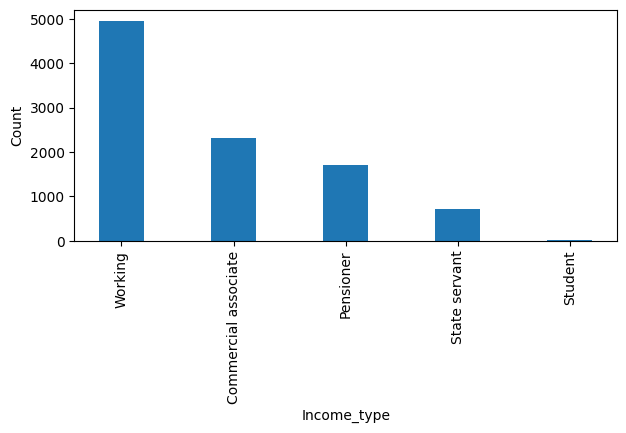

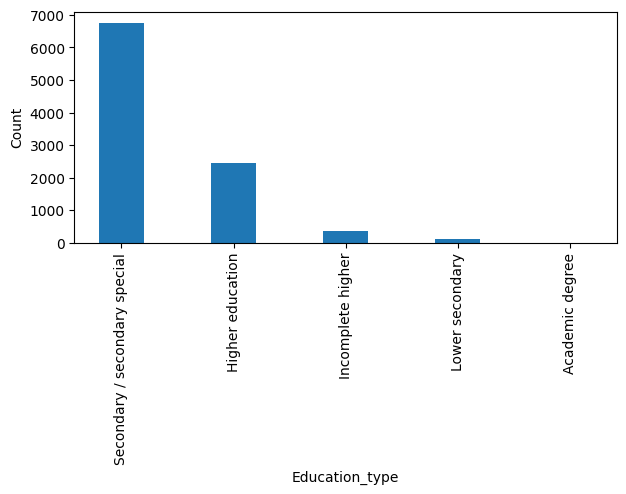

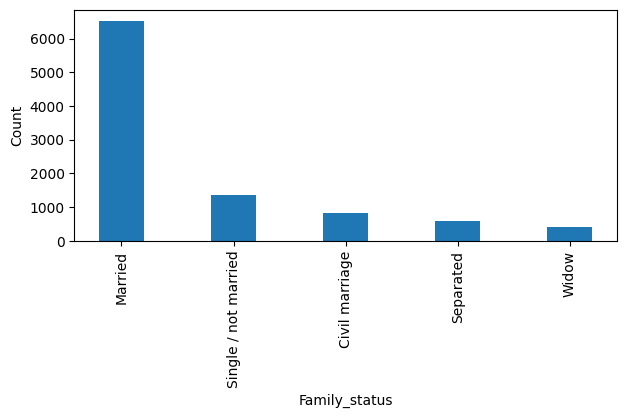

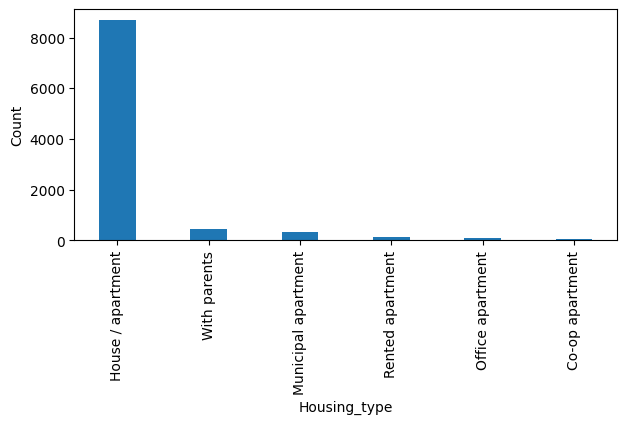

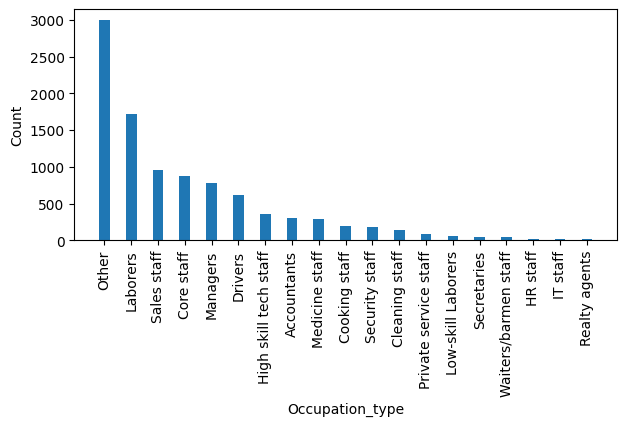

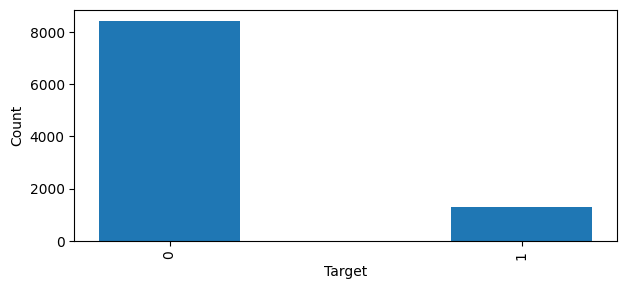

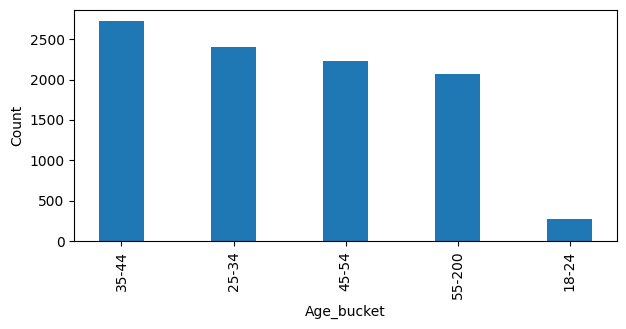

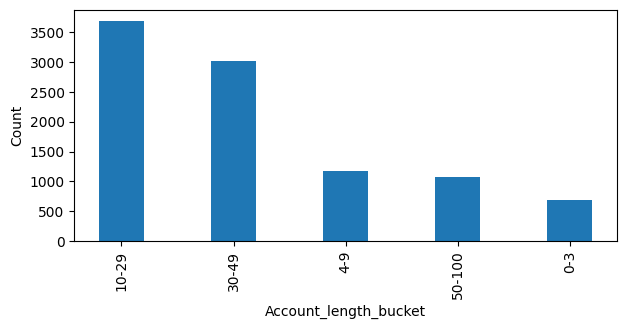

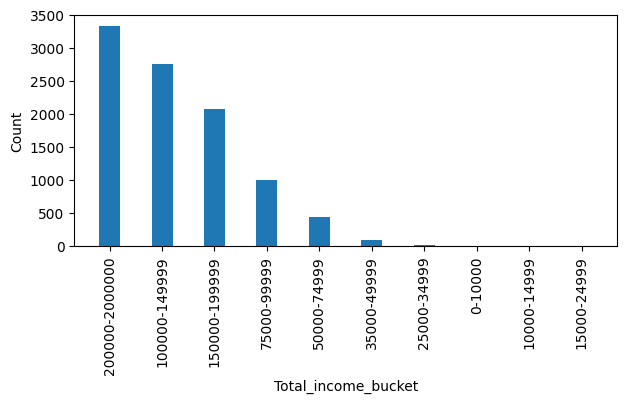

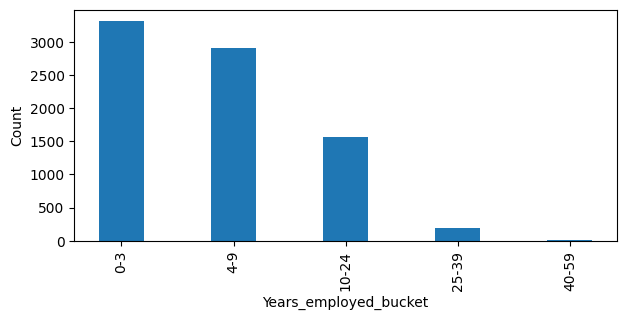

In [125]:
for column in data.columns:
    if column not in ('ID', 'Age', 'Account_length', 'Total_income', 'Years_employed'):
        plot_category_frequency(data, column)

In [129]:
data[(data['Years_employed_bucket'] == '0-3') & (data['Total_income_bucket'] == '200000-2000000')][['ID', 'Total_income', 'Occupation_type', 'Income_type', 'Years_employed']]

,ID,Total_income,Occupation_type,Income_type,Years_employed
4,5008815,270000.0,Accountants,Working,2.105450
9,5008836,270000.0,Laborers,Working,3.184186
17,5008888,247500.0,Core staff,Commercial associate,3.687961
26,5008991,270000.0,Cleaning staff,Working,3.269061
27,5008998,270000.0,Managers,Working,2.266987
...,...,...,...,...,...
9669,5105738,292500.0,Core staff,Commercial associate,1.839874
9670,5105739,292500.0,Core staff,Pensioner,1.839874
9676,5115455,270000.0,Accountants,Pensioner,1.697502
9685,5117134,270000.0,Sales staff,Working,2.179374


# Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [141]:
y = np.array(data['Target'])
x_dict = {}

for column in continuous_cols:
    x = np.array(data[column]).reshape(-1,1)
    x_dict[column] = x